In [1]:
%matplotlib inline
import requests
import xml.etree.ElementTree as et
from xml.parsers.expat import ExpatError
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import urllib.request as urllib2

In [2]:
pip install -r requirements.txt

  Using cached bleach-3.0.1-py2.py3-none-any.whl (148 kB)
  Using cached certifi-2018.8.24-py2.py3-none-any.whl (147 kB)
  Using cached decorator-4.3.0-py2.py3-none-any.whl (9.2 kB)
  Using cached defusedxml-0.5.0-py2.py3-none-any.whl (33 kB)
  Using cached entrypoints-0.2.3-py2.py3-none-any.whl (9.4 kB)
  Using cached idna-2.7-py2.py3-none-any.whl (58 kB)
  Using cached ipykernel-5.1.0-py3-none-any.whl (113 kB)
  Using cached ipython-7.0.1-py3-none-any.whl (760 kB)
  Using cached ipywidgets-7.4.2-py2.py3-none-any.whl (111 kB)
  Using cached jedi-0.13.1-py2.py3-none-any.whl (177 kB)
  Using cached Jinja2-2.10.1-py2.py3-none-any.whl (124 kB)
  Using cached json2table-1.1.5-py2.py3-none-any.whl (8.7 kB)
  Using cached jsonschema-2.6.0-py2.py3-none-any.whl (39 kB)
  Using cached jupyter_client-5.2.3-py2.py3-none-any.whl (89 kB)
  Using cached jupyter_console-6.0.0-py2.py3-none-any.whl (21 kB)
  Using cached jupyter_core-4.4.0-py2.py3-none-any.whl (126 kB)
  Using cached kiwisolver-1.0.1-c

ERROR: spyder 4.0.1 requires pyqt5<5.13; python_version >= "3", which is not installed.
ERROR: spyder 4.0.1 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
ERROR: pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
ERROR: pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.
ERROR: astroid 2.3.3 requires typed-ast<1.5,>=1.4.0; implementation_name == "cpython" and python_version < "3.8", which is not installed.
ERROR: yfinance 0.1.70 has requirement pandas>=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
ERROR: yfinance 0.1.70 has requirement requests>=2.26, but you'll have requests 2.20.1 which is incompatible.
ERROR: spyder 4.0.1 has requirement jedi==0.14.1, but you'll have jedi 0.13.1 which is incompatible.
ERROR: spyder 4.0.1 has requirement qtconsole>=4.6.0, but you'll have qtconsole 4.4.1 which is incompatible.
ERROR: spyder-kernels 1.8.1 has requirement ipykernel>=5.1.3; python_version > "

In [3]:
#---- Scrape XML From Treasury Website ----#
year  = 2022
curpath = os.path.dirname(os.path.realpath("./yield"))
data_dir = data_dir = curpath + '/data/xml'
while (year <=2021):
    filename = os.path.join(data_dir, '%s.xml' %year )
    resp = urllib2.urlopen('http://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData?$filter=year(NEW_DATE)%20eq%20'+ str(year))
    xml = resp.read()
    with open(filename, "wb") as file:
        file.write(xml)
        print("Pulled file: %s" % filename)    
    year += 1

In [4]:
#-------- Retrieve XML Files --------#
# Current  directory:
curpath = os.path.dirname( os.path.abspath("./yield/"))

# Traverse a directory
data_dir = curpath + '/data/'
def traverse_directory(directory):
    files = [directory+f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    return files

In [5]:
# ----Prepend Namespaces for Retrieval ----#
def prepend_atom(s):
    return '{http://www.w3.org/2005/Atom}' + s

def prepend_schema(s):
    return '{http://schemas.microsoft.com/ado/2007/08/dataservices/metadata}%s' % s

def prepend_ds(s):
    return '{http://schemas.microsoft.com/ado/2007/08/dataservices}%s' % s

In [6]:
# ----Build a Dictionary of All Entries from 1990 to Present  ----#
def build_entries_dict(count, dentries, root):
    for elem in root.findall(prepend_atom('entry')):
        count +=1
        dentry = {}
        properties = elem.find(prepend_atom('content')).find(prepend_schema('properties'))
        iid = elem.find(prepend_atom('content')).find(prepend_schema('properties')).find(prepend_ds('Id')).text
        date = elem.find(prepend_atom('content')).find(prepend_schema('properties')).find(prepend_ds('NEW_DATE')).text
        bc_1month = elem.find(prepend_atom('content')).find(prepend_schema('properties')).find(prepend_ds('BC_1MONTH')).text
        bc_3month = elem.find(prepend_atom('content')).find(prepend_schema('properties')).find(prepend_ds('BC_3MONTH')).text
        bc_6month = elem.find(prepend_atom('content')).find(prepend_schema('properties')).find(prepend_ds('BC_6MONTH')).text
        bc_1yr = elem.find(prepend_atom('content')).find(prepend_schema('properties')).find(prepend_ds('BC_1YEAR')).text
        bc_2yr = elem.find(prepend_atom('content')).find(prepend_schema('properties')).find(prepend_ds('BC_2YEAR')).text
        bc_3yr = elem.find(prepend_atom('content')).find(prepend_schema('properties')).find(prepend_ds('BC_3YEAR')).text
        bc_5yr = elem.find(prepend_atom('content')).find(prepend_schema('properties')).find(prepend_ds('BC_5YEAR')).text
        bc_7yr = elem.find(prepend_atom('content')).find(prepend_schema('properties')).find(prepend_ds('BC_7YEAR')).text
        bc_10yr = elem.find(prepend_atom('content')).find(prepend_schema('properties')).find(prepend_ds('BC_10YEAR')).text
        bc_30yr = elem.find(prepend_atom('content')).find(prepend_schema('properties')).find(prepend_ds('BC_30YEAR')).text
        bc_30yr_display = elem.find(prepend_atom('content')).find(prepend_schema('properties')).find(prepend_ds('BC_30YEARDISPLAY')).text
        dentry['date'] = date
        dentry['1m'] = bc_1month
        dentry['3m'] = bc_3month
        dentry['6m'] = bc_6month
        dentry['1y'] = bc_1yr
        dentry['2y'] = bc_2yr
        dentry['3y'] = bc_3yr
        dentry['5y'] = bc_5yr
        dentry['7y'] = bc_7yr
        dentry['10y'] = bc_10yr
        dentry['30y'] = bc_30yr
        dentries[iid] = dentry
    return dentries

In [7]:
# ---- Parse the XML to create a Dict of All Data ---#
def parse_xml(filename, count, dentries):
    try:
        #Parse the given XML file:
        tree = et.parse(filename)
    except ExpatError as e:
        print ("[XML] Error (line %d): %d" % (e.lineno, e.code))
        print ("[XML] Offset: %d" % (e.offset))
        raise e
    except IOError as e:
        print ("[XML] I/O Error %d: %s" % (e.errno, e.strerror))
        raise e
    else:
        root = tree.getroot()
        dentries = build_entries_dict(count, dentries, root)
    return dentries

In [8]:
#-------- Main --------#
count = 0
dentries = {}
curpath = os.path.dirname( os.path.abspath("./yield/"))
data_dir = curpath + '/data/xml/'
xml_files = traverse_directory(data_dir)
for f in xml_files:
    dentries = parse_xml(f, count, dentries)

In [9]:
# ---- Load JSON Into Pandas DataFrame ----#
# Convert dict to JSON
json_entries = json.dumps(dentries)
# Create a Panda Dataframe
df = pd.read_json(json_entries, convert_dates=True, convert_axes=True, orient='index')
df = df[['date','1m', '3m', '6m', '1y', '2y', '3y', '5y', '7y', '10y', '30y']]
df['10y/6m'] = df['10y']/df['6m']
df['10y/1y'] = df['10y']/df['1y']
df['10y/2y'] = df['10y']/df['2y']
df['10y/3y'] = df['10y']/df['3y']
df['10y/5y'] = df['10y']/df['5y']
df['10y/7y'] = df['10y']/df['7y']
df['30y/10y'] = df['30y']/df['10y']
df.head(300)

,date,1m,3m,6m,1y,2y,3y,5y,7y,10y,30y,10y/6m,10y/1y,10y/2y,10y/3y,10y/5y,10y/7y,30y/10y
8010,2022-01-03,0.05,0.08,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.01,7.409091,4.075000,2.089744,1.567308,1.189781,1.051613,1.233129
8011,2022-01-04,0.06,0.08,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.07,7.545455,4.368421,2.155844,1.627451,1.211679,1.057325,1.246988
8012,2022-01-05,0.05,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.09,7.772727,4.170732,2.060241,1.554545,1.195804,1.055556,1.222222
8013,2022-01-06,0.04,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.09,7.521739,3.844444,1.965909,1.504348,1.176871,1.042169,1.208092
8014,2022-01-07,0.05,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.11,7.333333,4.093023,2.022989,1.504274,1.173333,1.041420,1.198864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7268,2019-01-16,2.41,2.43,2.49,2.57,2.55,2.53,2.54,2.62,2.73,3.07,1.096386,1.062257,1.070588,1.079051,1.074803,1.041985,1.124542
7269,2019-01-17,2.41,2.42,2.50,2.57,2.56,2.55,2.58,2.66,2.75,3.07,1.100000,1.070039,1.074219,1.078431,1.065891,1.033835,1.116364
7270,2019-01-18,2.40,2.41,2.50,2.60,2.62,2.60,2.62,2.70,2.79,3.09,1.116000,1.073077,1.064885,1.073077,1.064885,1.033333,1.107527
7271,2019-01-22,2.38,2.43,2.51,2.59,2.58,2.55,2.57,2.65,2.74,3.06,1.091633,1.057915,1.062016,1.074510,1.066148,1.033962,1.116788


In [10]:
# ---- Visualize Data ----#
# Global Plot Configs
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (60,22)
plt.rcParams.update({'font.size': 33})

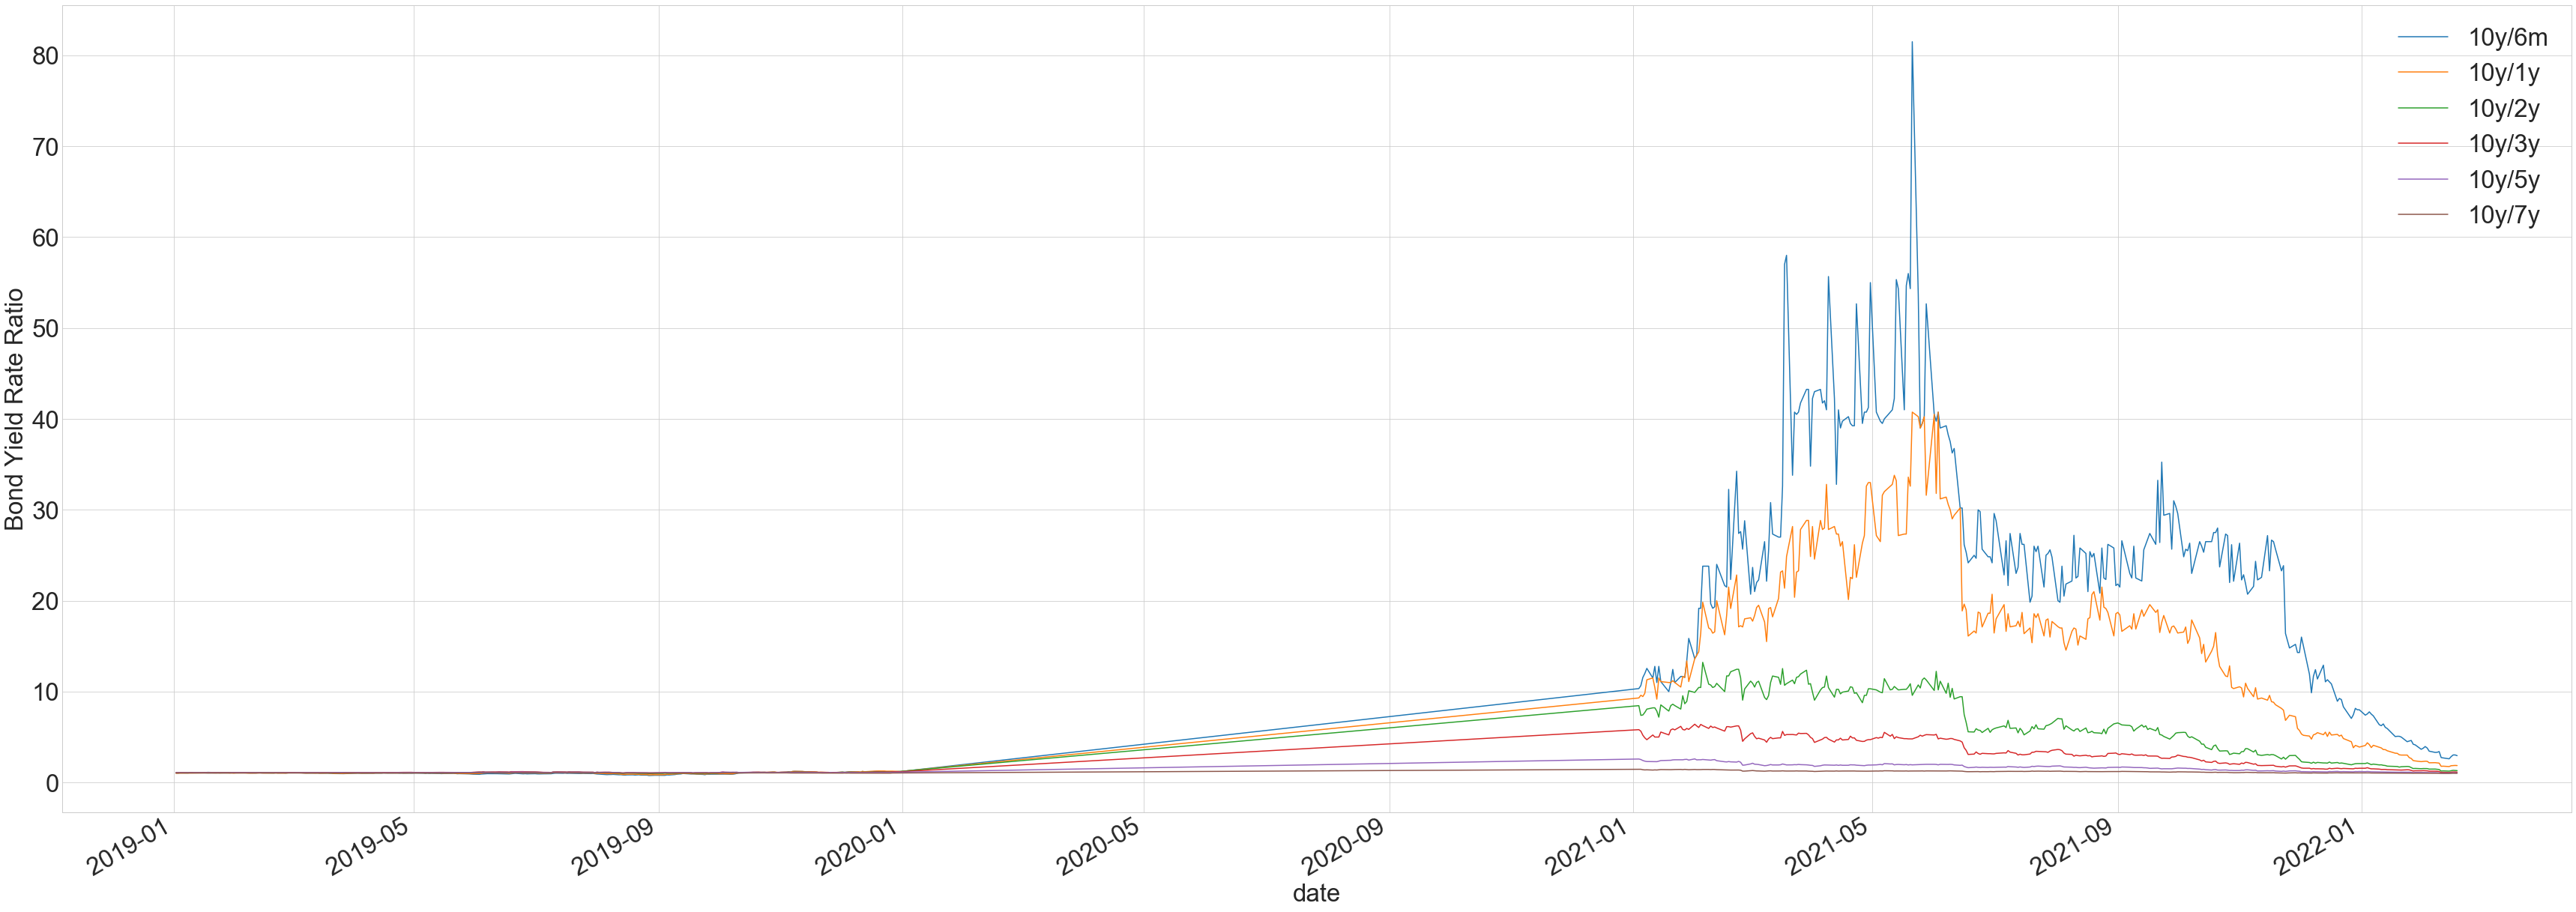

In [11]:
ax = plt.gca()
plt.ylabel('Bond Yield Rate Ratio')
df.plot(kind='line', x='date', y='10y/6m', ax=ax)
df.plot(kind='line', x='date', y='10y/1y', ax=ax)
df.plot(kind='line', x='date', y='10y/2y', ax=ax)
df.plot(kind='line', x='date', y='10y/3y', ax=ax)
df.plot(kind='line', x='date', y='10y/5y', ax=ax)
df.plot(kind='line', x='date', y='10y/7y', ax=ax)

plt.show()

In [12]:
print(df)

           date    1m    3m    6m    1y    2y    3y    5y    7y   10y   30y  \
8010 2022-01-03  0.05  0.08  0.22  0.40  0.78  1.04  1.37  1.55  1.63  2.01   
8011 2022-01-04  0.06  0.08  0.22  0.38  0.77  1.02  1.37  1.57  1.66  2.07   
8012 2022-01-05  0.05  0.09  0.22  0.41  0.83  1.10  1.43  1.62  1.71  2.09   
8013 2022-01-06  0.04  0.10  0.23  0.45  0.88  1.15  1.47  1.66  1.73  2.09   
8014 2022-01-07  0.05  0.10  0.24  0.43  0.87  1.17  1.50  1.69  1.76  2.11   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
7503 2019-12-24  1.55  1.58  1.61  1.53  1.62  1.64  1.72  1.83  1.90  2.33   
7504 2019-12-26  1.59  1.58  1.61  1.53  1.64  1.65  1.72  1.85  1.90  2.33   
7505 2019-12-27  1.56  1.57  1.59  1.51  1.59  1.60  1.68  1.80  1.88  2.32   
7506 2019-12-30  1.51  1.57  1.60  1.57  1.58  1.59  1.68  1.81  1.90  2.34   
7507 2019-12-31  1.48  1.55  1.60  1.59  1.58  1.62  1.69  1.83  1.92  2.39   

        10y/6m    10y/1y    10y/2y    10y/3y    10y